<a href="https://colab.research.google.com/github/vectominist/MiniASR/blob/main/example/recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MiniASR Tutorial: Recognition**
This is a tutorial for recognizing speech with a pre-trained end-to-end automatic speech recognition model using the toolkit [MiniASR](https://github.com/vectominist/MiniASR).

## **Installation & Preprocessing**

In [ ]:
! sudo apt-get install sox 

In [ ]:
! pip3 install fairseq@git+https://github.com//pytorch/fairseq.git@f2146bdc7abf293186de9449bfa2272775e39e1d#egg=fairseq

! git clone https://github.com/vectominist/MiniASR.git
% cd MiniASR
! pip3 install -e ./
% cd ..

In [ ]:
! mkdir -p data
% cd data
! wget https://www.openslr.org/resources/12/dev-clean.tar.gz
! tar zxf dev-clean.tar.gz
! rm dev-clean.tar.gz
% cd ..

In [ ]:
! miniasr-preprocess \
    -c LibriSpeech \
    -p data/LibriSpeech \
    -s dev-clean \
    -o data/libri_dev

In [ ]:
! wget -O ctc_eng.ckpt https://www.dropbox.com/s/1k3mpngqpinihlo/ctc_ls960_hubert_base_char.ckpt?dl=0

In [ ]:
% cd MiniASR/

/content/MiniASR


## **Load Model**

In [ ]:
from miniasr.utils import load_from_checkpoint, sequence_distance
from miniasr.data.audio import load_waveform

model, args, tokenizer = load_from_checkpoint('../ctc_eng.ckpt', 'cuda')
model.eval()

## **Recognize a Sample**

In [ ]:
waves = [load_waveform('../data/LibriSpeech/dev-clean/6345/93302/6345-93302-0025.flac').to('cuda')]
hyps = model.recognize(waves)
print(hyps[0])
ref = 'ARE YOU REALLY GOING TO THROW ME OVER FOR A THING LIKE THIS'
res_cer = sequence_distance(ref, hyps[0], mode='char')
res_wer = sequence_distance(ref, hyps[0], mode='word')
print('CER = {:.2f}%'.format(100. * res_cer['distance'] / res_cer['length']))
print('WER = {:.2f}%'.format(100. * res_wer['distance'] / res_wer['length']))

ARE YOU REALLY GOING TO THROW ME OVER FOR A THING LIKE THIS
CER = 0.00%
WER = 0.00%


## **Record Your Own Voice**

Speak to your microphone 5 sec...


<IPython.core.display.Javascript object>

Done!


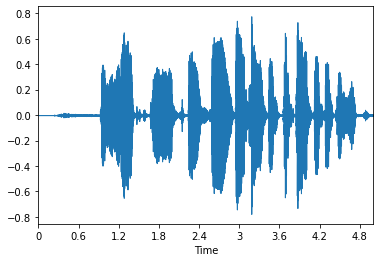

In [ ]:
# from https://gist.github.com/korakot/c21c3476c024ad6d56d5f48b0bca92be

from IPython.display import Javascript
from google.colab import output
from base64 import b64decode

RECORD = """
const sleep = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

def record(sec, filename='audio.wav'):
  display(Javascript(RECORD))
  s = output.eval_js('record(%d)' % (sec * 1000))
  b = b64decode(s.split(',')[1])
  with open(filename, 'wb+') as f:
    f.write(b)

audio = 'audio.wav'
second = 5
print(f"Speak to your microphone {second} sec...")
record(second, audio)
print("Done!")


import librosa
import librosa.display
speech, rate = librosa.load(audio, sr=16000)
librosa.display.waveplot(speech, sr=rate)

import matplotlib.pyplot as plt
plt.show()

import pysndfile
pysndfile.sndio.write('audio_ds.wav', speech, rate=rate, format='wav', enc='pcm16')

from IPython.display import display, Audio
display(Audio(speech, rate=rate))

In [ ]:
waves = [load_waveform('audio_ds.wav').to('cuda')]
hyps = model.recognize(waves)
print(hyps[0])

I LIKED MATH UNTIL THEY ADDED THE ALPHABET IN IT
